# Examples for the code in NanonisMeasurement.py

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# NanBiasSpectroscopy

In [121]:
from NanonisMeasurement import NanBiasSpectroscopy            # import the class

BS = NanBiasSpectroscopy('Example-Data/Bias-Spectroscopy.dat')  # load a data file

# let's get the bias and setpoint used for this measurement
print(f'{BS.filename}\nMeasured on:{BS.timestamp}\nVb:  {BS.Vb:.3e} V\nIsp: {BS.Isp:.3e} A\nRt:  {BS.get_Rt():.3e} Ω\nGt:  {BS.get_Sigmat():.3e} S')

Example-Data\Bias-Spectroscopy.dat
Measured on:2022-05-06 19:10:03
Vb:  4.000e-03 V
Isp: 1.000e-09 A
Rt:  4.000e+06 Ω
Gt:  2.500e-07 S


In [122]:
BS_IV = BS.get_IV(x_unit='mV',y_unit='nA')                      # get the IV curve. x_unit and y_unit are optional. Default is V and A
BS_dIdV = BS.get_dIdV(x_unit='mV')                              # get the dIdV. By default, Input 3 is used if it has been recorded.

### Quick automated plots of individual spectra

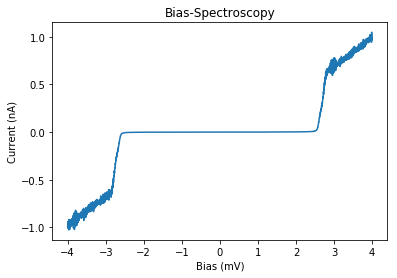

In [123]:
BS_IV.plot_standalone()                                         # plot the IV in a new figure

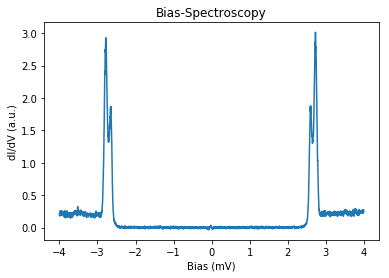

In [124]:
BS_dIdV.plot_standalone()                                       # plot the dIdV in a new figure

### Manual plots

For more manual control over the plot style, use the plot function:

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


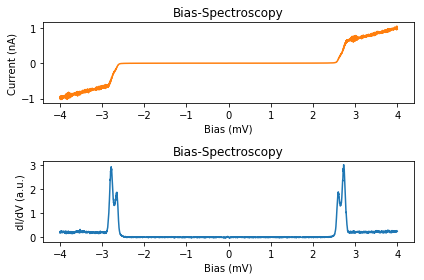

In [125]:
fig, (ax1,ax2) = plt.subplots(nrows=2)
BS_IV.setup_plot(ax1)                                       # prepare the axes labels, title, etc.
BS_IV.plot(ax1,plot_args={'color':'tab:orange'})            # plot, pass additional plot arguments to pyplot.plt

BS_dIdV.setup_plot(ax2)
BS_dIdV.plot(ax2)

fig.tight_layout()
fig.show()

### Simple data treatment

Let us look at some simple data treatment. (This uses functions of the simscidapy.Curve class)

In [126]:
# get the position of the positive bias peak in the conductance measurement
p1 = BS_dIdV.get_maximum(x_range=(0,None))
print(p1)

[2.7299999999999995, 3.01388]


In [127]:
# The peaks are coherence peaks of a superconducting sample. They should be symmetric around 0, unless there is a bias offset
p2 = BS_dIdV.get_maximum(x_range=(None,0))

bias_offset = (p1[0]+p2[0])/2
print(f'The bias offset is {bias_offset:.3f} mV')

The bias offset is -0.026 mV


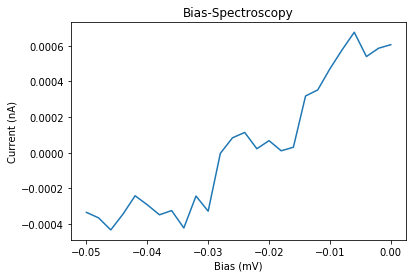

In [128]:
BS_IV.plot_standalone(x_range=(-0.05,0))

### Correct bias offset

The 'correct_bias_offset' function corrects the bias offset which it estimates from the IV curve.

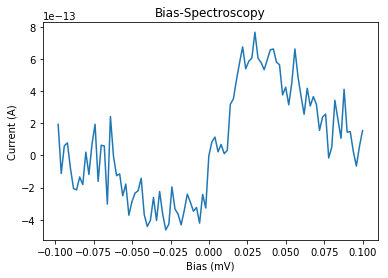

In [129]:
BS.correct_bias_offset()                                # estimate the bias offset from the IV curve and correct for it
BS_IV_corrected = BS.get_IV(x_unit='mV')
BS_IV_corrected.plot_standalone(x_range=(-0.1,0.1))

In [130]:
BS_dIdV_corrected = BS.get_dIdV()                        # cross-check with the coherence peak positions from the dIdV signal
(BS_dIdV_corrected.get_maximum(x_range=(None,0))[0]+BS_dIdV_corrected.get_maximum(x_range=(0,None))[0])/2

1.9062499999999549e-06

Note that the bias correction works in this case, however for many superconducting spectra (or any other spectrum with a gap around zero bias) this does not work properly.

### get some more meta data
The available informations depend on which modules are selected for saving in the Nanonis software! Make sure to always select all the relevant modules.

In [131]:
BS.get_available_properties()

dict_keys(['Experiment', 'Date', 'User', 'X (m)', 'Y (m)', 'Z (m)', 'Z offset (m)', 'Settling time (s)', 'Integration time (s)', 'Z-Ctrl hold', 'Final Z (m)', 'Filter type', 'Order', 'Cutoff frq', 'Comment01', 'Comment02', 'Comment03', 'Comment04', 'Bias>Bias (V)', 'Bias>Calibration (V/V)', 'Bias>Offset (V)', 'Bias Spectroscopy>Sweep Start (V)', 'Bias Spectroscopy>Sweep End (V)', 'Bias Spectroscopy>Num Pixel', 'Bias Spectroscopy>Z Avg time (s)', 'Bias Spectroscopy>Z offset (m)', 'Bias Spectroscopy>1st Settling time (s)', 'Bias Spectroscopy>Settling time (s)', 'Bias Spectroscopy>Integration time (s)', 'Bias Spectroscopy>End Settling time (s)', 'Bias Spectroscopy>Z control time (s)', 'Bias Spectroscopy>Max Slew rate (V/s)', 'Bias Spectroscopy>backward sweep', 'Bias Spectroscopy>Z-controller hold', 'Bias Spectroscopy>Number of sweeps', 'Bias Spectroscopy>Channels', 'Bias Spectroscopy>Reset Bias', 'Bias Spectroscopy>Record final Z', 'Bias Spectroscopy>Lock-In run', 'Bias Spectroscopy>Sweep

In [132]:
BS.get('Integration time (s)')

'20E-3'

# NanZSpectroscopy

This is the base class for Z Spectroscopies (could be STM, AFM, ...). For STM Z-Spectroscopies and their standard analysis functions see STM_ZSpectroscopy.py.

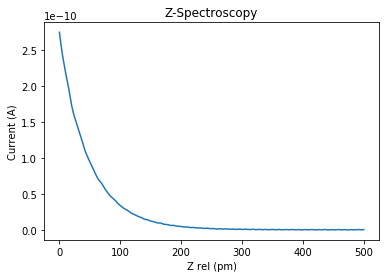

In [133]:
from NanonisMeasurement import NanZSpectroscopy

ZS = NanZSpectroscopy('Example-Data/Z-Spectroscopy.dat')  

ZS_IZ = ZS.get_curve('Current (A)',x_unit='pm')
ZS_IZ.plot_standalone()

# NanFrequencySweep

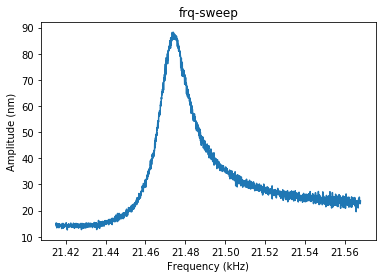

In [134]:
from NanonisMeasurement import NanFrequencySweep

FS = NanFrequencySweep('Example-Data/frq-sweep.dat')

FS_AF = FS.get_curve('Amplitude (m)',x_unit='kHz',y_unit='nm')
FS_AF.plot_standalone()


In [135]:
FS.get_available_properties()

dict_keys(['Experiment', 'Date', 'User', 'f_res (Hz)', 'Q', 'Phase (deg)', 'Amp/Exc (nm/mV)', 'Number of points', 'Fit length'])

In [136]:
FS.get('Q')

'1762'

In [137]:
FS.get('f_res (Hz)')

'21473,9993'

# NanHistory

In [138]:
from NanonisMeasurement import NanHistory

H = NanHistory('Example-Data/History.dat')
H.get_available_signals()

dict_keys(['Time (s)', 'Z (m)'])

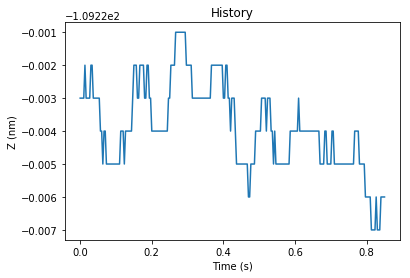

In [139]:
HZ = H.get_curve('Z (m)',y_unit='nm')
HZ.plot_standalone()

# NanGridSpectroscopy
Example file: Supercondcuting gap on ML NbSe2

In [140]:
from NanonisMeasurement import NanGridSpectroscopy

GS = NanGridSpectroscopy('Example-Data/Grid Spectroscopy.3ds')

In [141]:
GS.start_time

datetime.datetime(2022, 1, 28, 11, 4, 25)

In [142]:
GS.get_available_signals()

['Current (A)',
 'Input 3 (V)',
 'Input 4 (V)',
 'Current [bwd] (A)',
 'Input 3 [bwd] (V)',
 'Input 4 [bwd] (V)',
 'sweep_signal',
 'topo']

In [143]:
print(GS.pts_x)
print(GS.pts_y)

16
16


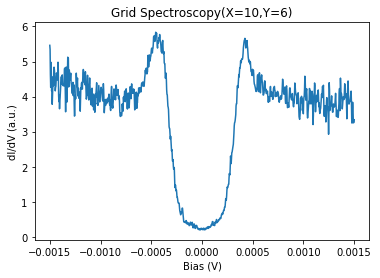

In [144]:
GS_BS = GS.get_spectrum(10,6)
GS_BS.get_dIdV().plot_standalone()

In [145]:
GS_BS.timestamp-GS.timestamp ## the spectrum carries the timestamp when it was measured

datetime.timedelta(0, 4459, 453072)

### Plot the real space position of the spectra
Note that this can be combined with the plotting of Scans and the positions of individually recorded spectra.

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


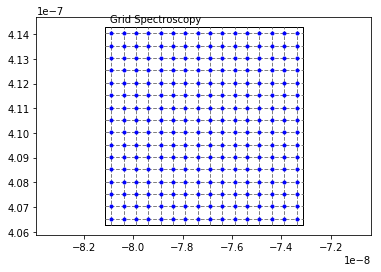

In [146]:
fig,ax = plt.subplots()
GS.plot(ax)
ax.axis('equal')
fig.show()

More manual way of doing practically the same:

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


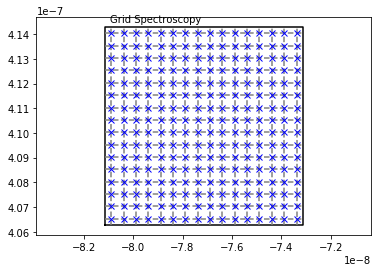

In [147]:
fig,ax = plt.subplots()
GS.draw_surrounding_box(ax,surrounding_box_args={'color':'k'})
GS.draw_grid_lines(ax,grid_line_args={'color':'grey','ls':'--'})
GS.draw_points(ax,default_pt_args={'color':'b','marker':'x'})
GS.annotate(ax,GS.title)
ax.axis('equal')
fig.show()

Let us highlight the one spectrum plotted above

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


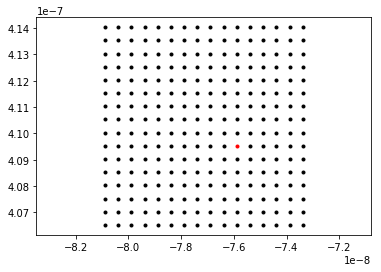

In [148]:
fig,ax = plt.subplots()

def pt_style(BS,x,y):
    color = 'r' if x==10 and y== 6 else 'k'
    return {'marker':'.','color':color}
    
GS.draw_points(ax,pt_style_callback=pt_style)
ax.axis('equal')
fig.show()

or do something even more complex: 
extract the dIdV value at a certain bias and use this as the color value for the points

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


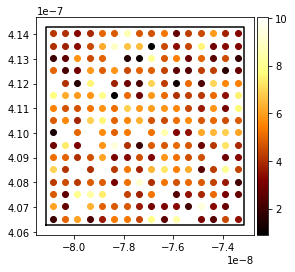

In [149]:
fig,ax = plt.subplots()
GS.draw_surrounding_box(ax,surrounding_box_args={'color':'k'})

def pt_style(BS,x,y):
    return {'value':BS.get_dIdV().evaluate(400e-6),'marker':'o'}
GS.draw_points(ax,pt_style_callback=pt_style)
ax.axis('equal')
fig.show()

### Extract line cuts

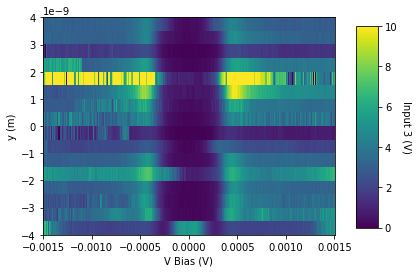

In [150]:
GS_x_map, GS_pt_start,GS_pt_stop = GS.map_spectra_along(axis='y',signal='Input 3 (V)')
GS_x_map.plot_standalone(colorbar_range=(0,10))

### Map the value at a certain bias

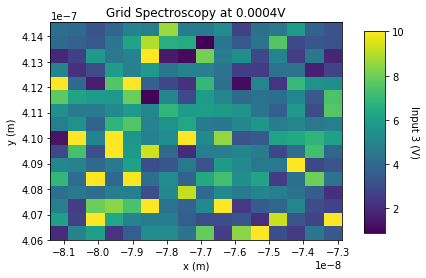

In [151]:
GS_400uV = GS.extract_const_bias_map("Input 3 (V)",bias=400e-6)
GS_400uV.plot_standalone()

### Extract the topography map

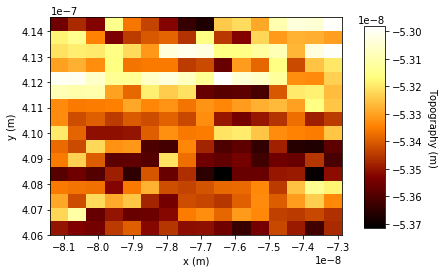

In [152]:
GS_topo = GS.extract_topo_map()
GS_topo.plot_standalone()

# Using a thermometer function to automatically load the temperature
In our case, we load temperatures using the Sionludi class. If you use a different thermometer, you just need to implement a function that returns its temperature for a given timestamp.

In [153]:
from SionludiMeasurement import Sionludi
from datetime import datetime
s = Sionludi('Example-Data')
s.get_value(datetime(2022,5,1,12),'T3@JT2')

0.0595113

Let us use the thermometer functionality of the Nanonis measurements to automatically load the temperature for the measurements. This is particularly interesting for Grid Spectroscopies during which the temperature changed.
We use this to perform temperature dependent Bias Spectroscopies by launching a Line of 0nm spatial length and lots of spectra. During the measurement we then slowly heat up the setup.

The thermometer functionality then allows to automatically attribute the measurement temperature to each of the spectra in the grid.

In [154]:
thermometer = lambda ts: s.get_value(ts,'T3@JT2') # the thermometer function takes a time stamp as an argument and returns the temperature (float)
GS_TSweep = NanGridSpectroscopy('Example-Data/Grid Spectroscopy Temperature Sweep.3ds',thermometer=thermometer)

In [155]:
GS_TSweep_BS = GS_TSweep.get_spectrum(0,0) # let us look at the very first spectrum
GS_TSweep_BS.T 

0.0621

In [156]:
GS_TSweep.get_spectrum(200,0).T         # some time later (spectrum number 200), the temperature increased

0.16699999999999998

Things work in the same way for all other spectroscopies.

### Plot a map of the conductance as function of temperature

In [157]:
n_spectra = GS_TSweep.number_of_valid_spectra()
yvals = GS_TSweep.get_spectrum(0,0).get_IV().get_x()
data_size = [n_spectra,len(yvals)]
x = np.zeros(data_size)
y = np.zeros(data_size)
z = np.zeros(data_size)

for i in range(n_spectra):
    spec = GS_TSweep.get_spectrum(i,0)
    x[i] = spec.T*np.ones(data_size[1])
    y[i] = yvals
    z[i] = spec.get_dIdV().get_y()

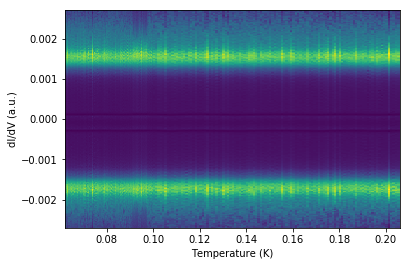

In [158]:
fig,ax = plt.subplots()
ax.pcolormesh(x,y,z)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('dI/dV (a.u.)')
plt.show()